<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-01-dataunderstanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

**Pandas** is the shorthand for 'Python and Data Analysis'

- It provides a rich set of features for exploring and manipulating data
- [https://pandas.pydata.org/](https://pandas.pydata.org/)

pandas (Python) is a solution for the manipulation of relational data

- Two main data types: *Series* (e.g., temporal series) and *DataFrame* (e.g., table)
- Support to SQL-like operations (join/merge, aggregation, etc.)
- Data transformation: imputation of missing values, manipulation of data shape, et.


In [1]:
import pandas as pd  # By convention, the package pandas is imported as `pd`
print(pd.__version__)

2.2.2


# ... plus we will use other libraries

- NumPy: [https://numpy.org/](https://numpy.org/)
- Seaborn: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)
- Matplotlib: [https://matplotlib.org/](https://matplotlib.org/)

In [2]:
import numpy as np  # operations on arrays
import seaborn as sns  # plots
import matplotlib.pyplot as plt  # plots

## [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

- Two-dimensional, size-mutable, potentially heterogeneous tabular data.
- The primary pandas data structure.
- Data structure also contains labeled axes (rows and columns).
- Arithmetic operations align on both row and column labels.
- Can be thought of as a dict-like container for Series objects.

In [3]:
# create a numeric dataframe/table
df = pd.DataFrame([[i + j for i in range(10)] for j in range(5)],
                  index=[i for i in range(5)],
                  columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0,1,2,3,4,5,6,7,8,9
1,1,2,3,4,5,6,7,8,9,10
2,2,3,4,5,6,7,8,9,10,11
3,3,4,5,6,7,8,9,10,11,12
4,4,5,6,7,8,9,10,11,12,13


## Some operations

In [4]:
# Get the headers (i.e., the column names)
df.columns
# Get just the first two rows
df.head(2)
# Get just the last two rows
df.tail(2)
# Sort the dataframe by columns
df.sort_values(by=['a', 'b'], ascending=[False, True])

,a,b,c,d,e,f,g,h,i,j
4,4,5,6,7,8,9,10,11,12,13
3,3,4,5,6,7,8,9,10,11,12
2,2,3,4,5,6,7,8,9,10,11
1,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9


## [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

A sequence of values with the same type

- Each value is associate with a label
- Supported values and label types are the ones from NumPy (float64, int64, etc.)
- In other words, a series is a mono-dimensional vector of elements

The index of a series is the sequence of labels

- Label are usually numeric or string identifiers (e.g., the primary key of a database table)
- Labels need not be unique but must be a hashable type (both integer- and label-based indexing)

In [5]:
pd.Series([1, 2, 3], index=["a", "b", "c"])

a    1
b    2
c    3
dtype: int64

In [6]:
# Select a column (i.e., a series) as in a SQL projection
df['a']

0    0
1    1
2    2
3    3
4    4
Name: a, dtype: int64

# Doing some element-wise operations

Operations between Series (e.g., +, -, /) align values based on their associated index values

In [7]:
# Add another column to the dataframe
df['k'] = df['a'] * df['b']
df

,a,b,c,d,e,f,g,h,i,j,k
0,0,1,2,3,4,5,6,7,8,9,0
1,1,2,3,4,5,6,7,8,9,10,2
2,2,3,4,5,6,7,8,9,10,11,6
3,3,4,5,6,7,8,9,10,11,12,12
4,4,5,6,7,8,9,10,11,12,13,20


In [8]:
ser_a = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser_b = pd.Series([1, 2, 3], index=["b", "a", "c"])
ser_a + ser_b  # +, -, /, *

a    3
b    3
c    6
dtype: int64

# Filtering the data

In [9]:
df[df['a'] > 2]  # filter the entire dataframe

,a,b,c,d,e,f,g,h,i,j,k
3,3,4,5,6,7,8,9,10,11,12,12
4,4,5,6,7,8,9,10,11,12,13,20


In [10]:
df[df['a'] > 2]['a']  # filter and select the column 'a'

3    3
4    4
Name: a, dtype: int64

# Doing some aggregation

In [11]:
ser_c = df["a"]
ser_c.count()  # count the values => 5
ser_c.sum()    # sum the values => 10
ser_c.mean()   # average the values => 2.0
ser_c.max()    # maximum value => 4
ser_c.min()    # minimum value => 0
ser_c.idxmax() # index of the maximum value => 4

np.int64(4)

In [12]:
df.groupby(['a']).agg(['mean', 'count'])

b          c          d          e          f           g           h  \
  mean count mean count mean count mean count mean count  mean count  mean   
a                                                                            
0  1.0     1  2.0     1  3.0     1  4.0     1  5.0     1   6.0     1   7.0   
1  2.0     1  3.0     1  4.0     1  5.0     1  6.0     1   7.0     1   8.0   
2  3.0     1  4.0     1  5.0     1  6.0     1  7.0     1   8.0     1   9.0   
3  4.0     1  5.0     1  6.0     1  7.0     1  8.0     1   9.0     1  10.0   
4  5.0     1  6.0     1  7.0     1  8.0     1  9.0     1  10.0     1  11.0   

            i           j           k        
  count  mean count  mean count  mean count  
a                                            
0     1   8.0     1   9.0     1   0.0     1  
1     1   9.0     1  10.0     1   2.0     1  
2     1  10.0     1  11.0     1   6.0     1  
3     1  11.0     1  12.0     1  12.0     1  
4     1  12.0     1  13.0     1  20.0     1

# Type inference

Pandas automatically infers data types, or they can be specified during creation

- `np.floatN` represents floating numbers (e.g., -3.14)
- `np.intN`/`np.uintN` represent integers with/without sign (e.g., -42 and 42)
    - `N` is the number of needed bits: 8, 16, 32 o 64
- `bool`: Boolean values
- `datetime64`, timedelta64: timestamp and time intervals
- `object`: mainly used for strings

In [13]:
df = pd.DataFrame([
    ['Cola',   'low',    '05/07/2021', 10, 2],
    ['Bread',  'medium', '05/07/2021', 25, 1],
    ['Beer',   'high',   '06/07/2021', 100, 3],
    ['Diaper', 'high',   '06/07/2021', np.nan, 4],
    ['Pizza',  'medium', '06/07/2021', 25, 5]], columns=['ID', 'PriceBin', 'Date', 'Quantity', 'Review'])
df.dtypes

ID           object
PriceBin     object
Date         object
Quantity    float64
Review        int64
dtype: object

"It is imperative to know the attribute properties to carry out meaningful operations and research with them"

- Why is data type important?
- What are the implications of a data type?

# Attribute types

The attribute type determines which operator can be applied to the attribute

- Equality, sort, sum, ratio, etc.
- It makes sense to compute the average `Quantity` but not the average `ID`

Different attribute types

- (Categorical) **Nominal**: can distinguish the values (i.e., check equality)
- (Categorical) **Ordinal**: can distinguish and sort the values
- (Numeric) **Interval**: can distinguish and sort the values, and compute their difference
- (Numeric) **Ratio**: can distinguish and sort the values, and compute their difference and ratio

# The Likert scale

- `[*, **, ***, ****, *****]`
- `[1, 2, 3, 4, 5]`

What about averaging?

# The Likert scale

    Converting responses to a Likert-type question into an average seems an obvious and intuitive step, but it doesn't necessarily constitute good methodology. One important point is that respondents are often reluctant to express a strong opinion and may distort the results by gravitating to the neutral midpoint response. It also assumes that the emotional distance between mild agreement or disagreement and strong agreement or disagreement is the same, which isn't necessarily the case. At its most fundamental level, the problem is that the numbers in a Likert scale are not numbers as such, but a means of ranking responses.
    
The Likert scale is widely used in social work research, and is commonly constructed with four to seven points. It is usually treated as an interval scale, but strictly speaking it is an ordinal scale, where arithmetic operations cannot be conducted [1]

[1] Wu, Huiping, and Shing-On Leung. "Can Likert scales be treated as interval scales?—A simulation study." Journal of social service research 43.4 (2017): 527-532.

# Data profiling

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5 non-null      object 
 1   PriceBin  5 non-null      object 
 2   Date      5 non-null      object 
 3   Quantity  4 non-null      float64
 4   Review    5 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 332.0+ bytes


# Data profiling

In [15]:
# To get some statistics (e.g., count, mean, std, min, etc.)
df.describe(include='all')

,ID,PriceBin,Date,Quantity,Review
count,5,5,5,4.000000,5.000000
unique,5,3,2,NaN,NaN
top,Cola,medium,06/07/2021,NaN,NaN
freq,1,2,3,NaN,NaN
mean,NaN,NaN,NaN,40.000000,3.000000
std,NaN,NaN,NaN,40.620192,1.581139
min,NaN,NaN,NaN,10.000000,1.000000
25%,NaN,NaN,NaN,21.250000,2.000000
50%,NaN,NaN,NaN,25.000000,3.000000
75%,NaN,NaN,NaN,43.750000,4.000000


# Plotting the data distribution: histogram (numeric)

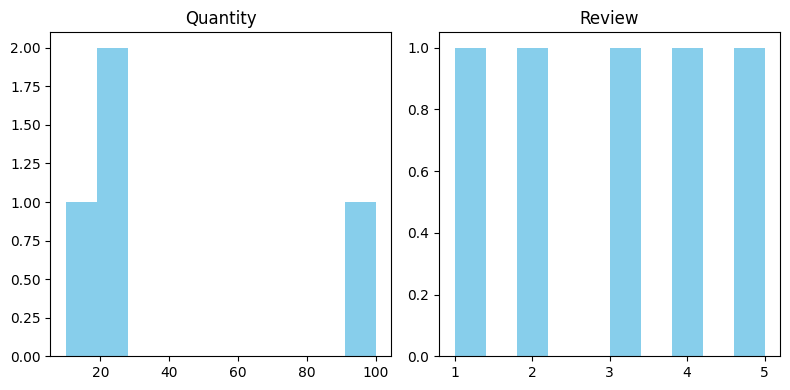

In [16]:
df.hist(figsize=(8, 4), bins=10, color='skyblue', grid=False)
plt.tight_layout()

# Plotting the data distribution: boxplots (numeric)

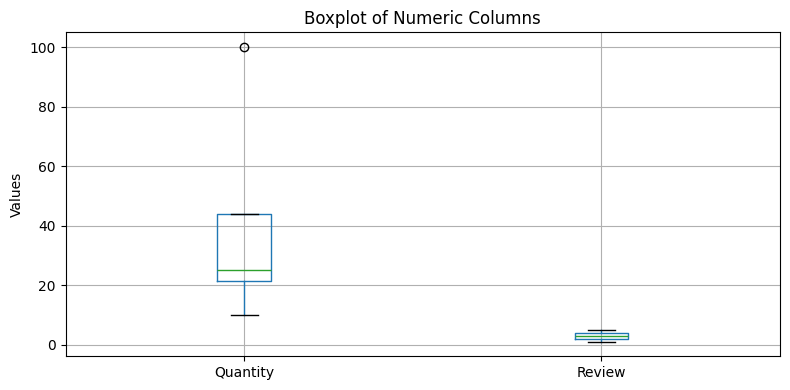

In [17]:
plt.figure(figsize=(8, 4))
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
numeric_cols.boxplot()
# Add a title and axis labels
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')
plt.tight_layout()

# Plotting the data distribution: histogram (categorical)

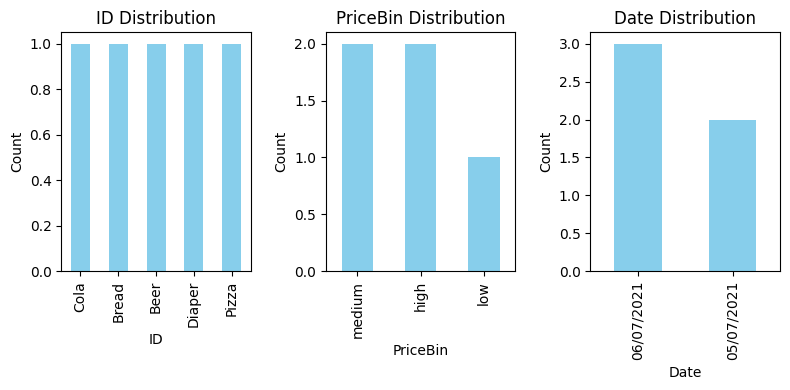

In [18]:
# Select only the categorical columns (non-numeric)
categorical_cols = df.select_dtypes(include=['object'])
# Plot the distribution of each categorical column
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_cols.columns), figsize=(8, 4))
# In case there is only one categorical column, we make sure axes is treated as an array
if len(categorical_cols.columns) == 1: axes = [axes]
# Loop over each categorical column and plot a bar plot
for i, col in enumerate(categorical_cols.columns):
    categorical_cols[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
# Show the plots
plt.tight_layout()

# Exercises

These exercises will help you get familiar with basic Pandas operations and cover tasks you'll need when working with data.

When in troubles, check the documentation at [http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

1. Create a DataFrame with columns `Name`, `Age`, and `City` and data `[["Alice", 20, "New York"], ["Bob", 21, "Los Angeles"], ["Charlie", 19, "New York"]]`. Hint: Use `pd.DataFrame()`, see the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
2. Select and print the column `Name`. Hint: Use `df['column_name']`.
3. Filter the DataFrame to show rows where `Age` is greater/equal than 20.
4. Add a new column `Year` fill it 2024 - the `Age` of every person. Hint: Use `df['new_column'] = values`.
5. Group the DataFrame by `City` and calculate the average `Age` for each city. Hint: Use `df.groupby()`, see the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).
6. Sort the DataFrame by Age in descending order. Hint: Use `df.sort_values()`, see the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
7. Export the final DataFrame to a CSV file. Hint: Use `df.to_csv()`, see the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

In [19]:
# write your code here